In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (roc_curve, confusion_matrix, ConfusionMatrixDisplay, 
                             auc, precision_score, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def get_model_metrics(model, X_test, y_test):
    y_pred = np.round(model.predict(X_test))
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    area_under_curve = auc(tpr, fpr)
    print(area_under_curve)
    plt.plot(fpr, tpr)
    plt.show()
    
    # dcm = plt.figure(figsize=(5, 5))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    
    print(f'Precision: {precision_score(y_test, y_pred)}\nRecall: {recall_score(y_test, y_pred)}\nF1 Score: {f1_score(y_test, y_pred)}')

In [4]:
data_X, data_y = load_breast_cancer(return_X_y=True, as_frame=True)

In [5]:
data_X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=2)

In [7]:
scalar = MinMaxScaler()

In [8]:
X_train_standard = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

In [9]:
X_train_standard.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.336775,0.326764,0.331365,0.215502,0.391821,0.248518,0.203139,0.238499,0.341707,0.279530,0.103561,0.188456,0.097014,0.060933,0.179146,0.167873,0.101858,0.284161,0.152789,0.129685,0.293621,0.366984,0.280153,0.167870,0.400485,0.219101,0.215039,0.390855,0.326911,0.188042
std,0.166382,0.148281,0.167792,0.150002,0.128695,0.162092,0.181304,0.191876,0.142603,0.150284,0.101254,0.119739,0.096463,0.087126,0.102755,0.133003,0.086115,0.143214,0.116267,0.109516,0.168836,0.165877,0.164261,0.136409,0.153549,0.151440,0.165697,0.225748,0.151369,0.118683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225472,0.218465,0.218955,0.119173,0.295342,0.124472,0.066448,0.098807,0.240790,0.171326,0.043455,0.103673,0.039438,0.020364,0.112911,0.073519,0.047778,0.183863,0.076127,0.060833,0.182319,0.241738,0.169481,0.081265,0.289771,0.111923,0.087061,0.216362,0.227054,0.105325
50%,0.300961,0.310450,0.294036,0.170901,0.381782,0.212387,0.140558,0.165308,0.333155,0.251583,0.072931,0.169466,0.069641,0.031972,0.155726,0.132248,0.085122,0.266504,0.128154,0.101761,0.250089,0.359275,0.235320,0.123206,0.392459,0.177363,0.179473,0.344816,0.304930,0.157528
75%,0.414549,0.411904,0.412618,0.262142,0.470073,0.332370,0.291940,0.340656,0.418847,0.353243,0.124407,0.246486,0.114074,0.068226,0.216830,0.223004,0.134217,0.359658,0.196194,0.164610,0.372821,0.478945,0.366253,0.207752,0.494156,0.304945,0.307748,0.553910,0.397598,0.241874
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
X_const = sm.add_constant(X_train_standard)

In [12]:
vif = pd.DataFrame()
vif["cols"] = X_const.columns
vif["vif"] = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]
vif

,cols,vif
0,const,112.658247
1,mean radius,3930.892813
2,mean texture,12.371988
3,mean perimeter,3754.658901
4,mean area,437.152378
5,mean smoothness,8.720642
6,mean compactness,51.468043
7,mean concavity,77.437209
8,mean concave points,64.661983
9,mean symmetry,4.414541


In [13]:
vif[vif['vif'] > 5].shape

(28, 2)

In [14]:
vif[vif['vif'] < 5]

,cols,vif
9,mean symmetry,4.414541
12,texture error,4.285146
15,smoothness error,4.114974


In [15]:
corr = X_train_standard.corr()
# fig = plt.figure(figsize=(10, 10))
# corr = corr.mask(np.where(np.abs(corr) > 0.75, True, False))
# sns.heatmap(corr, annot=True)

<Axes: >

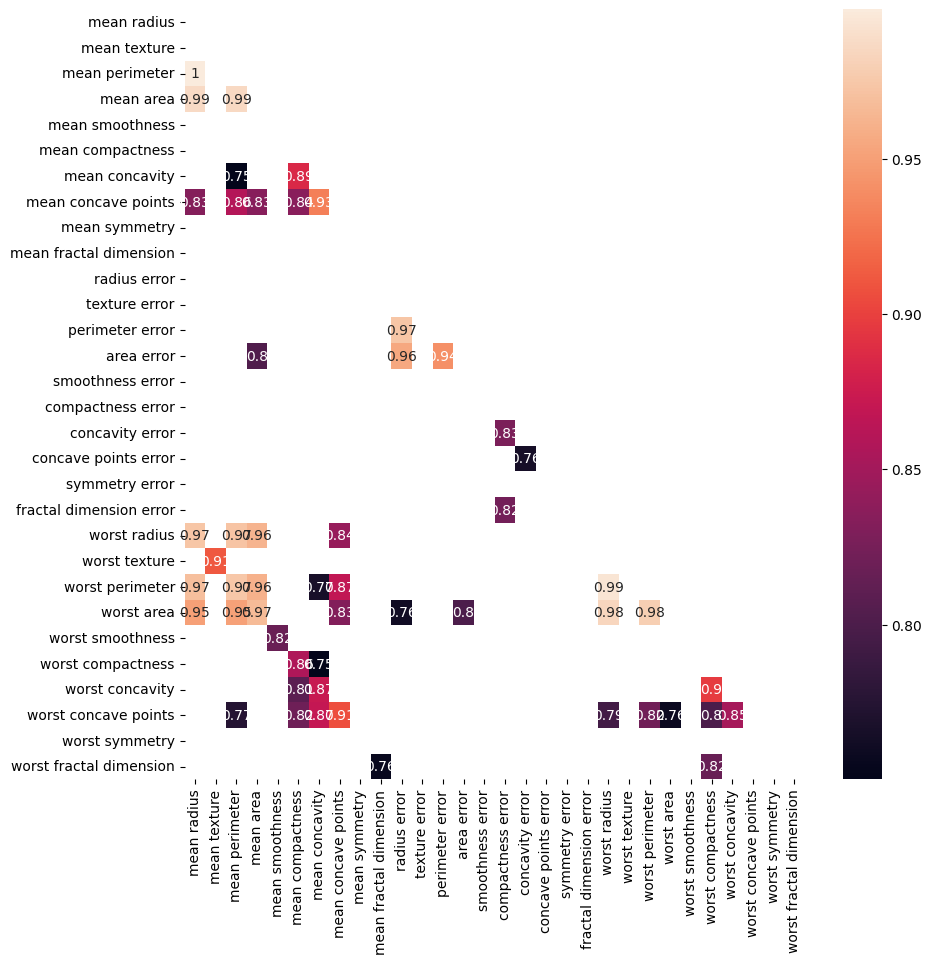

In [16]:
corr = X_train_standard.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
mask_high_corr = np.abs(corr) < 0.75
mask = mask | mask_high_corr
fig = plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    mask=mask, 
    annot=True
)

In [17]:
lr = sm.Logit(y_train, X_train_standard)
model_lr = lr.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
model_lr.summary()

In [18]:
X_train_red = X_train_standard[['mean radius',
 'mean area',
 'mean concave points',
 'mean fractal dimension',
 'concavity error',
 'concave points error',
 'worst radius',
 'worst area']]

In [19]:
lr = sm.Logit(y_train, X_train_red)
model_lr = lr.fit()
model_lr.summary()

Optimization terminated successfully.
         Current function value: 0.077706
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      447
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                  0.8818
Time:                        05:12:46   Log-Likelihood:                -35.356
converged:                       True   LL-Null:                       -299.10
Covariance Type:            nonrobust   LLR p-value:                9.864e-110
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
mean radius              126.8438     48.872      2.595      0.009      31.057     222.631
mean area                -68.3543     65.731     -1.040      0.298    -197.184      60.476
mean concave points      -37.4848      7.107     -5.274      0.000     -51.414     -23.555
mean fractal dimension     5.7386      2.826      2.031      0.042       0.200      11.277
concavity error           -2.5444      4.043     -0.629      0.529     -10.468       5.379
concave points error       3.9421      4.111      0.959      0.338      -4.115      11.999
worst radius              33.5202     54.210      0.618      0.536     -72.729     139.769
worst area              -215.7259     94.924     -2.273      0.023    -401.774     -29.678
==========================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns, index=X_test.index)
X_test_red = X_test_scaled[['mean radius',
 'mean area',
 'mean concave points',
 'mean fractal dimension',
 'concavity error',
 'concave points error',
 'worst radius',
 'worst area']]


0.07294685990338165


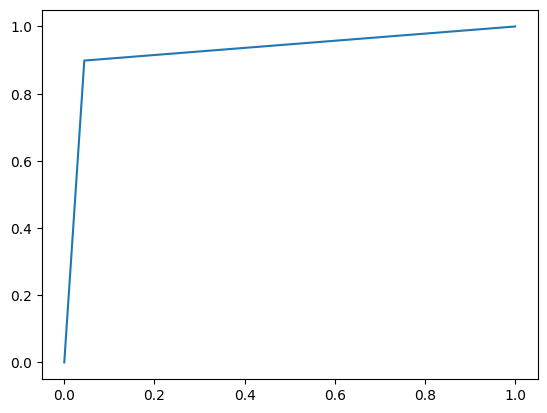

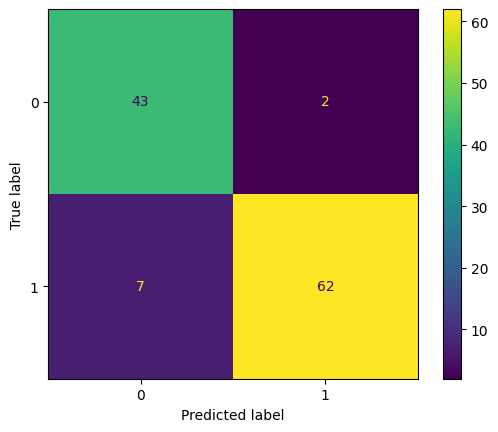

Precision: 0.96875
Recall: 0.8985507246376812
F1 Score: 0.9323308270676691


In [21]:
get_model_metrics(model_lr, X_test_red, y_test)

In [22]:
import pickle

In [24]:
pickle.dump(model_lr, open('model.pkl', 'wb'))



In [26]:
from google.cloud import storage

In [27]:
client = storage.Client()

In [28]:
bucket = client.bucket('trained-models-1234')
blob = bucket.blob('breast-cancer-model/model.pkl')
blob.upload_from_filename('model.pkl')

In [29]:
import sklearn as sk

In [32]:
sk.__version__

'1.6.1'

In [2]:
import numpy as np
np.__version__

'2.1.3'

In [3]:
import pandas as pd
pd.__version__

'2.2.3'

In [35]:
X_test[['mean radius',
 'mean area',
 'mean concave points',
 'mean fractal dimension',
 'concavity error',
 'concave points error',
 'worst radius',
 'worst area']].to_numpy()

array([[1.394e+01, 5.942e+02, 6.615e-02, 6.457e-02, 4.763e-02, 2.853e-02,
        1.462e+01, 6.533e+02],
       [1.496e+01, 6.873e+02, 4.819e-02, 5.852e-02, 1.536e-02, 1.187e-02,
        1.625e+01, 8.098e+02],
       [9.668e+00, 2.863e+02, 5.769e-03, 6.412e-02, 1.031e-02, 3.934e-03,
        1.115e+01, 3.802e+02],
       [2.227e+01, 1.509e+03, 1.823e-01, 7.039e-02, 1.040e-01, 2.480e-02,
        2.840e+01, 2.360e+03],
       [1.442e+01, 6.412e+02, 4.223e-02, 6.412e-02, 3.840e-02, 1.243e-02,
        1.667e+01, 8.621e+02],
       [1.955e+01, 1.207e+03, 1.144e-01, 6.232e-02, 3.863e-02, 1.519e-02,
        2.505e+01, 1.926e+03],
       [1.175e+01, 4.198e+02, 3.738e-02, 6.453e-02, 4.167e-02, 1.152e-02,
        1.332e+01, 5.439e+02],
       [1.320e+01, 5.373e+02, 3.261e-03, 5.894e-02, 1.128e-03, 2.386e-03,
        1.441e+01, 6.369e+02],
       [1.225e+01, 4.603e+02, 2.331e-02, 6.228e-02, 1.994e-02, 7.924e-03,
        1.359e+01, 5.642e+02],
       [1.481e+01, 6.807e+02, 2.541e-02, 5.348e-02, 1.4